In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Poker cards
Poker uses a standard deck consisting of 52 cards. Each card has a rank and a suite.
There are 13 ranks and 4 suites

To learn more  about poker hands and their probabilities, see here:
[poker probabilities](https://en.wikipedia.org/wiki/Poker_probability)

In [4]:
n_rank=13
n_suit=4
n_hand=5
ranks=[str(i) for i in range(1,n_rank+1)]
all_suits='HSCDABEFGIKLMNOPQRTUVWXYZ'
suits=all_suits[:n_suit] # Hearts, Spades, Clubs Diamonds
cards=[]
for s in suits:
    for r in ranks:
        cards.append((r,s))
print 'Number of cards=',len(cards),'\nThe first three cards are',cards[:3]

Number of cards= 52 
The first three cards are [('1', 'H'), ('2', 'H'), ('3', 'H')]


In [5]:
hand=random.permutation(cards)[:n_hand]
print hand

[['5' 'C']
 ['9' 'S']
 ['2' 'S']
 ['5' 'D']
 ['2' 'D']]


## Computing the probability of "single pair"
we will compute the probability of two-of-a-kind (= single pair) in two different ways:

1. Using a simulation to get approximate answers and
2. Using combinatoric to compute an exact answer

### Simulation

In [6]:
1==0 & True

False

In [7]:
def two_of_a_kind(hand):
    counts=count_by_rank(hand)
    flag=(counts[2]==1)  # check two of a kind (single pair)
    for key in counts.keys():  # Check that there are not ranks with more than two.
        if key>2:
            flag &= counts[key]==0 
    return flag

In [8]:
from collections import Counter

def count_by_rank(hand):
    """ 
    Given a hand, compute the number of singles, pairs, triples and 4's
    A 'pair' refers to two cards of the same rank.
    Input: hand: A list of cards, each card has the form (rank,suit)
    Output: a dictionary that maps 1,2,3,4 to the number of ranks with that number of suits.
    """
    D=Counter()
    for rank,suit in hand:
        D[rank]+=1
        C=Counter()
    for rank,count in D.items():
        C[count]+=1
    return C

hand=[(6,s) for s in suits]+[(7,'H')]
print hand
count_by_rank(hand)

[(6, 'H'), (6, 'S'), (6, 'C'), (6, 'D'), (7, 'H')]


Counter({1: 1, 4: 1})

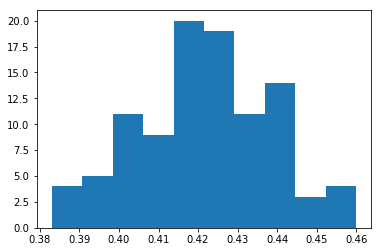

In [9]:
def simulate_prob(cond,n=1000,k=100):
    P_est=[]
    for j in range(k):
        hits=0
        for i in range(n):
            hand=random.permutation(cards)[:5]
            hits+=cond(hand)
        P_est.append(float(hits)/n)
    return P_est

H=simulate_prob(two_of_a_kind)
hist(H);

## Using Combinatorics

In [10]:
# calculate the probabilities exactly
from math import exp,factorial
from scipy.special import gammaln

In [11]:
def C(n,k):
    a=gammaln(n+1)-gammaln(k+1)-gammaln(n-k+1)
    return int(round(exp(a)))

C(4,2)

6

In [12]:
#number of ways to choose 5 cards from a standard deck
C(52,5)

2598960

### Compute the probability of  two of a kind
Order of choices:
1. choose the rank of the pair: $13$
2. choose the suits of the pair: $C(4,2)=6$
3. choose the ranks of the three singles: $C(12,3)$
4. choose the suits of the three singles: $4^3$ 

In [13]:
((13.*C(4,2))*C(12,3)*4**3)/C(52,5)

0.4225690276110444

In [14]:
def four_of_a_kind(hand):
    counts=count_by_rank(hand)
    flag=(counts[4]==1)  # check four of a kind
    for key in counts.keys():  # Check that there are no other multiples
        if key==2 or key==3 or key>4:
            flag &= counts[key]==0 
    return flag

def three_of_a_kind(hand):
    flag=(counts[3]==1)  # check four of a kind
    for key in counts.keys():  # Check that there are no other multiples
        if key==2 or key>3:
            flag &= counts[key]==0 
    return flag

def full_house(hand):  #a two and a three
    counts=count_by_rank(hand)
    flag=(counts[2]==1 and counts[3]==1)  # check two of a kind and 3 of a kind
    for key in counts.keys():  # Check that there are no other multiples
        if key>3:
            flag &= counts[key]==0 
    return flag
    return counts[2]==1 and counts[3]==1

### Full House (a 2 and a 3)
Order of choices:
1. choose the rank of the pair: $13$
2. choose the suits of the pair: $C(4,2)=6$
3. choose the ranks of the triple: $13-1=12$
4. choose the suits of the three singles: $C(4,3)=4$ 

In [15]:
((13.*C(4,2))*12*4)/C(52,5)

0.0014405762304921968

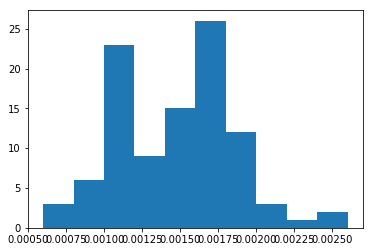

In [16]:
H=simulate_prob(full_house,n=10000,k=100)
hist(H);

## Homework

 A flush is a hand in which all of the cards are of the same suit. (note that we do not exclude royal flush and straight flush for this problem).
 
Find the probability of a flush in two ways:
1. Write a function called (`flush`) to decide if a hand is a flush and use `simulate_prob(flush)` to perform a monte-carlo simulation.
```python
def flush(hand):
    # Your code should return True if the hand is a flush, False otherwise
```
2. Write a function `calc_prob_flush()` that computes the probability of a flush.

In [17]:
def flush(hand):
    rank,suit0=hand[0]
    for rank,suit1 in hand[1:]:
        if suit1 != suit0:
            return False
    return True

In [18]:
hand=[(str(i) for i in for s in suits]+[(7,'H')]

SyntaxError: invalid syntax (<ipython-input-18-05bf96f04d32>, line 1)